# Explorarea Datelor (Exploratory Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart_test_df = pd.read_csv("heart_4_test.csv")
heart_train_df = pd.read_csv("heart_4_train.csv")
heart_df = pd.concat([heart_test_df, heart_train_df], ignore_index=True)

pirvision_test_df = pd.read_csv("pirvision_office_test.csv")
pirvision_train_df = pd.read_csv("pirvision_office_train.csv")
pirvision_df = pd.concat([pirvision_test_df, pirvision_train_df], ignore_index=True)

## 1. Analiza tipului de atribute și a plajei de valori a acestora

In [2]:
heart_numerical = heart_df.select_dtypes(include=['float64', 'int64'])
heart_statistics = heart_numerical.describe(percentiles=[.25, .5, .75]).T
heart_statistics['non_missing'] = heart_numerical.notnull().sum()
heart_statistics = heart_statistics[['non_missing', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
heart_statistics

,non_missing,mean,std,min,25%,50%,75%,max
blood_pressure_medication,4196,0.029552,0.169368,0.000000,0.000000,0.000000,0.000000,1.000000
cholesterol_level,3878,236.618222,43.481077,107.000000,207.000000,235.000000,262.000000,600.000000
stroke_history,4240,0.005896,0.076569,0.000000,0.000000,0.000000,0.000000,1.000000
systolic_pressure,4240,132.354599,22.033300,83.500000,117.000000,128.000000,144.000000,295.000000
hypertension_history,4240,0.310613,0.462799,0.000000,0.000000,0.000000,1.000000,1.000000
daily_cigarettes,4217,9.005856,11.913975,0.000000,0.000000,0.000000,20.000000,70.000000
diastolic_pressure,4240,82.897759,11.910394,48.000000,75.000000,82.000000,90.000000,142.500000
heart_rate,4239,75.878981,12.025348,44.000000,68.000000,75.000000,83.000000,143.000000
smoking_status,3901,0.507049,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
diabetes_history,4240,0.025708,0.158280,0.000000,0.000000,0.000000,0.000000,1.000000


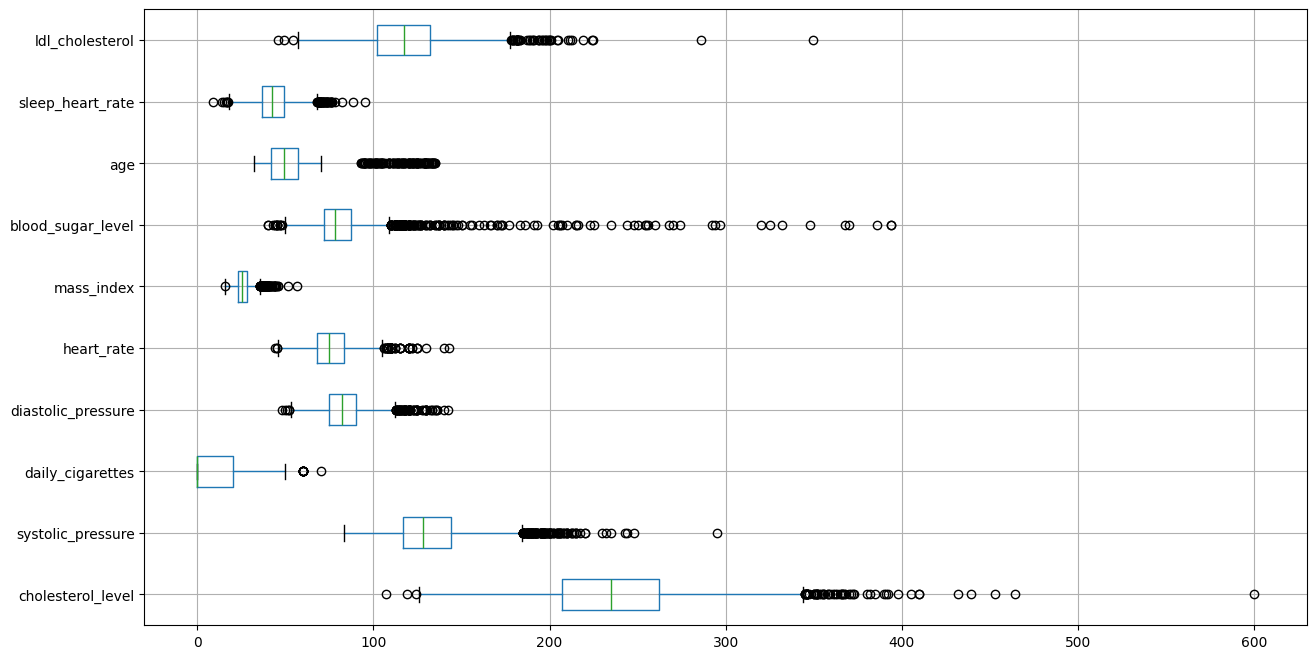

In [3]:
heart_continuous_columns = ['cholesterol_level', 'systolic_pressure', 'daily_cigarettes', 'diastolic_pressure', 'heart_rate', 'mass_index', 'blood_sugar_level', 'age', 'sleep_heart_rate', 'ldl_cholesterol']
heart_continuous_df = heart_df[heart_continuous_columns]
heart_continuous_df.boxplot(vert=False, figsize=(15, 8))
plt.show()

In [4]:
pirvision_numerical = pirvision_df.select_dtypes(include=['float64', 'int64'])
pirvision_statistics = pirvision_numerical.describe(percentiles=[.25, .5, .75]).T
pirvision_statistics['non_missing'] = pirvision_numerical.notnull().sum()
pirvision_statistics = pirvision_statistics[['non_missing', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
pirvision_statistics

,non_missing,mean,std,min,25%,50%,75%,max
Day Index,10000,2.005500,5.243064e-01,1.0,2.0,2.0,2.00,3.0
Temp (F),10000,80.392600,2.285846e+01,0.0,86.0,86.0,88.00,89.0
Temp (C),10000,26.698500,1.242325e+01,-17.0,30.0,30.0,31.00,31.0
OBS_1,9000,293891.306111,4.662186e+06,2613.0,10335.0,10433.0,10564.25,111602625.0
OBS_2,10000,10962.186600,1.363588e+03,2092.0,10779.0,11001.0,11281.00,16928.0
...,...,...,...,...,...,...,...,...
OBS_54,10000,10585.935000,4.532825e+02,2603.0,10514.0,10596.0,10684.00,16383.0
OBS_55,10000,10449.015700,4.379376e+02,2602.0,10388.0,10453.0,10523.00,16383.0
OBS_56,10000,11014.590200,4.807371e+02,2547.0,10929.0,11026.0,11129.00,17157.0
OBS_57,10000,10026.850500,4.205693e+02,2530.0,9957.0,10033.0,10109.00,15713.0


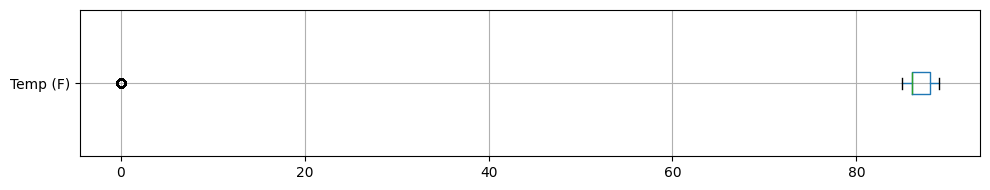

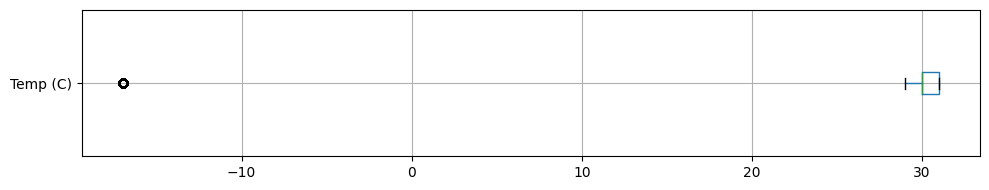

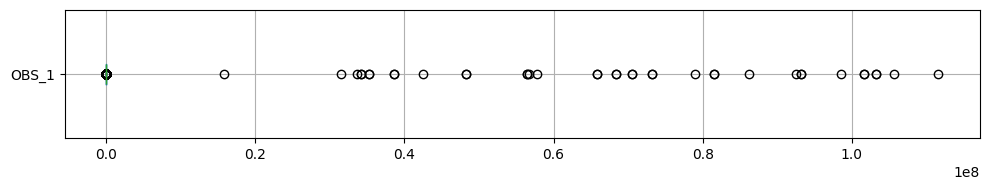

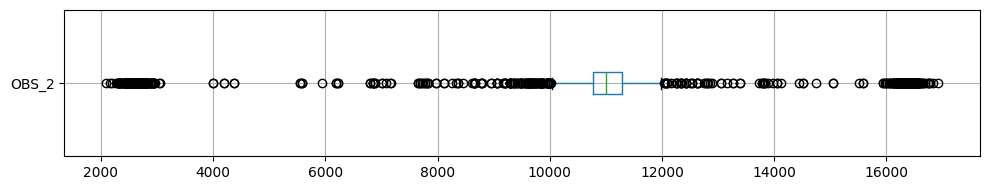

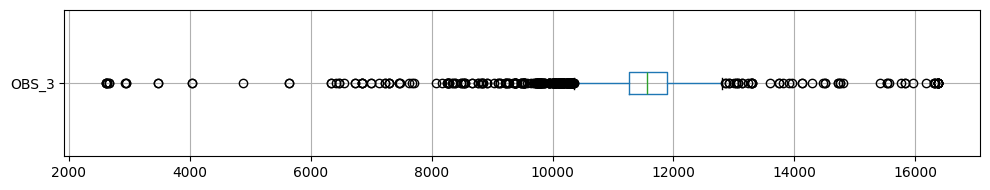

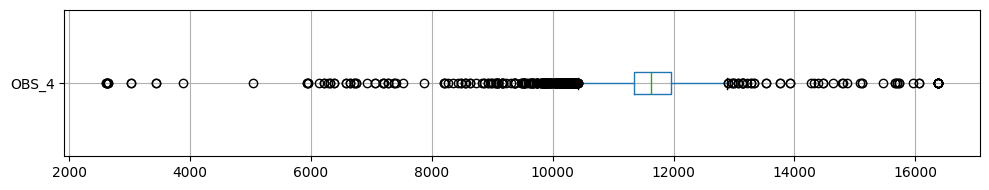

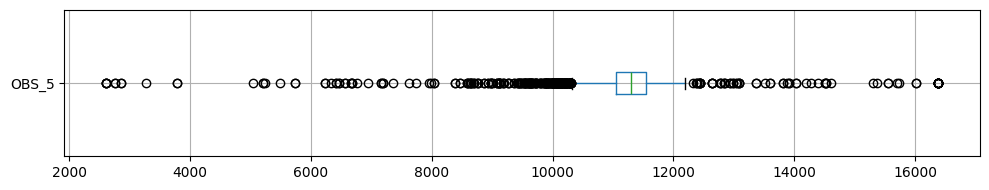

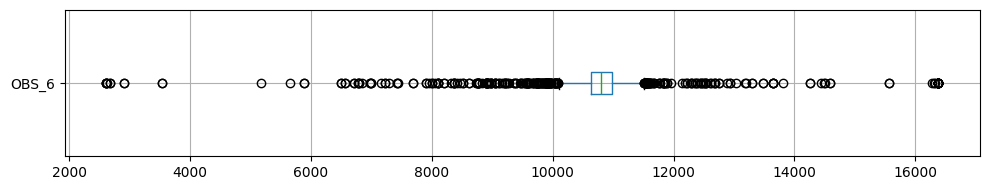

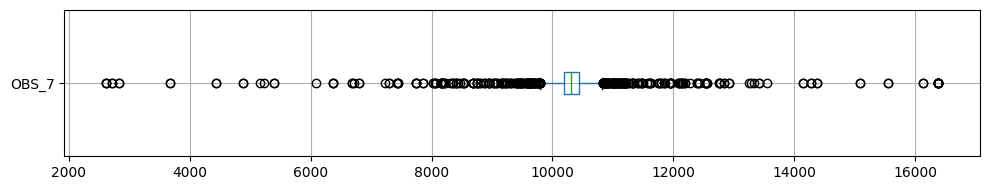

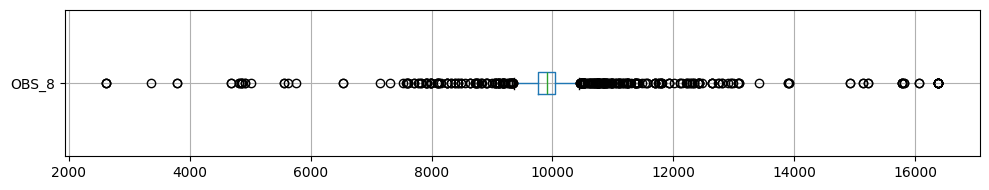

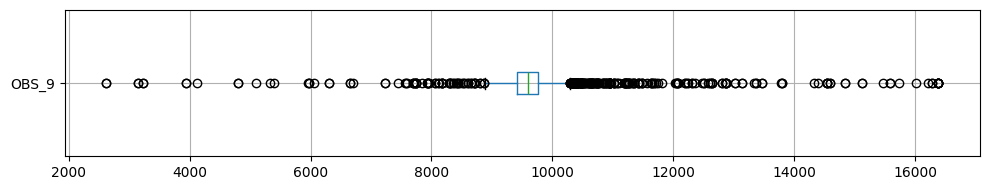

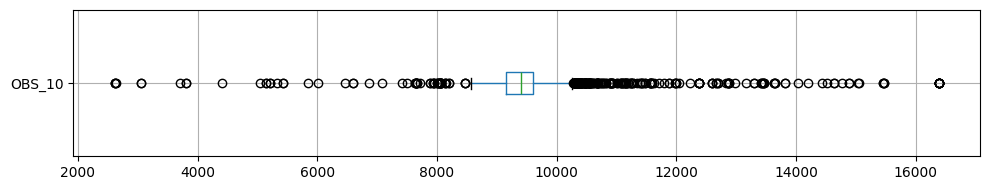

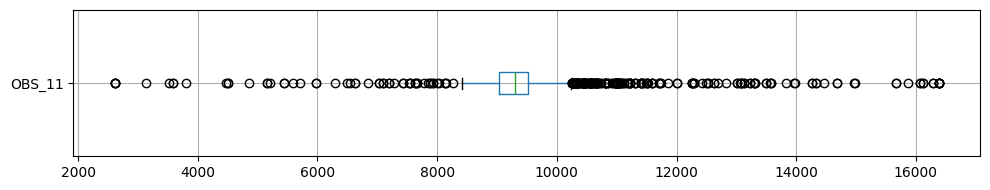

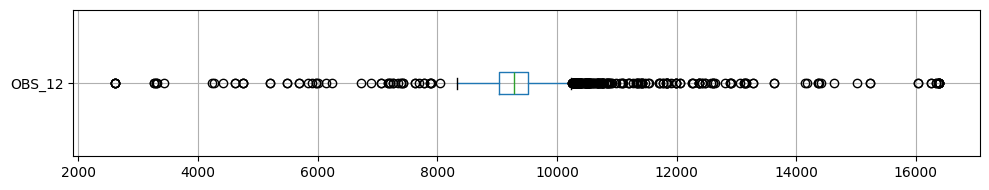

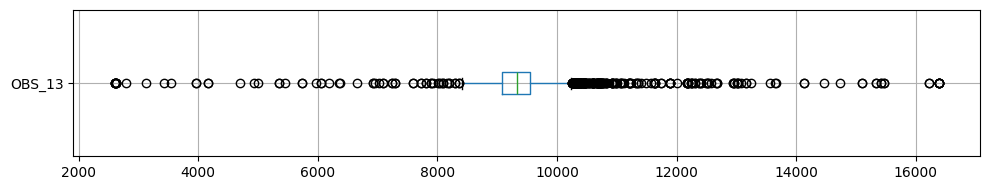

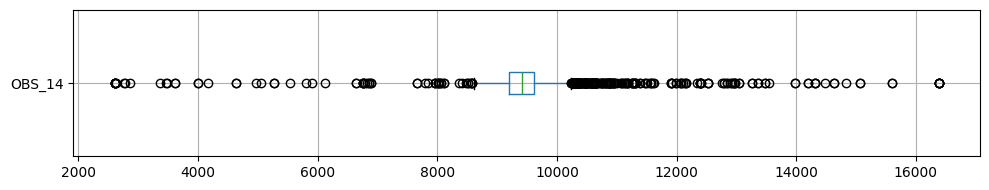

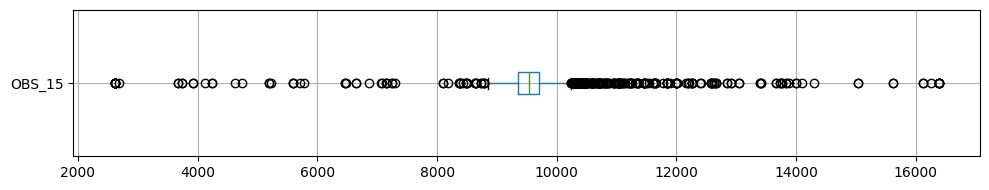

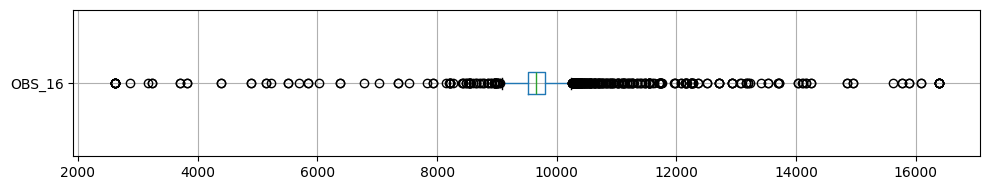

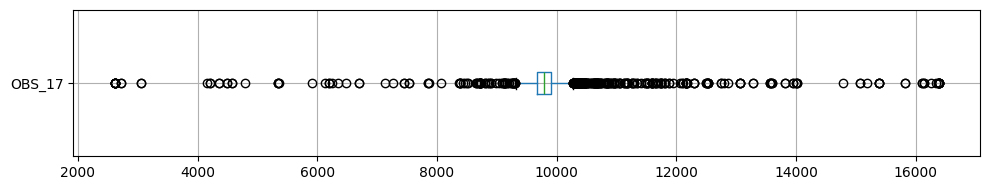

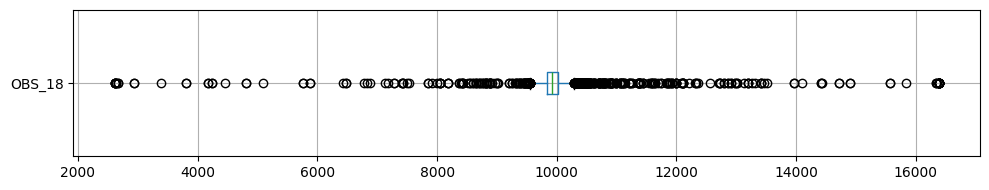

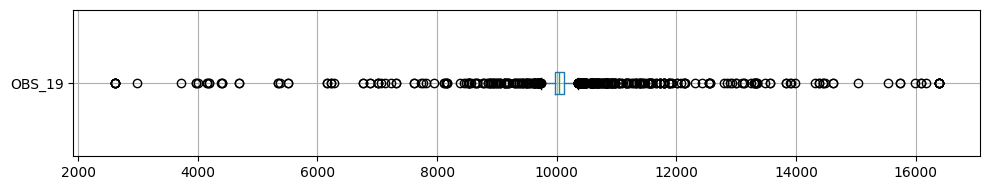

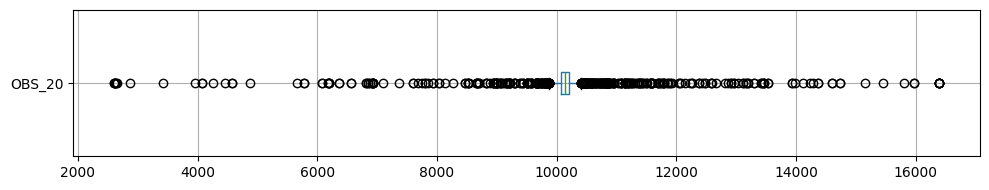

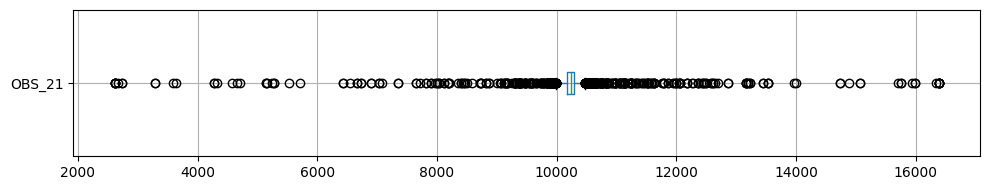

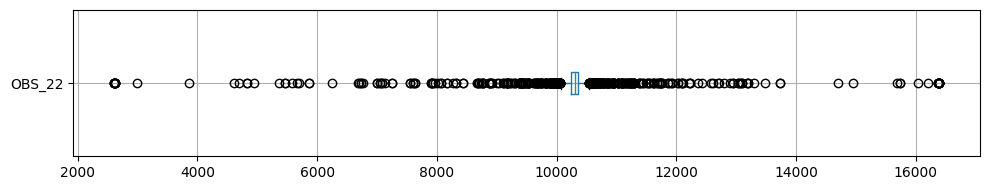

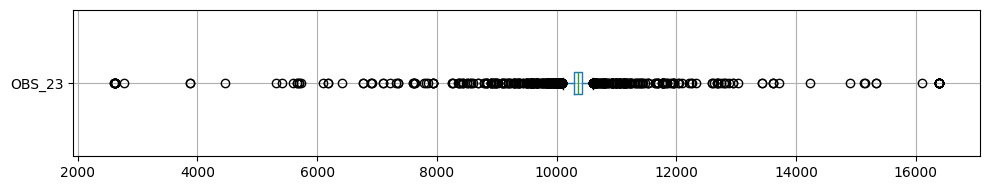

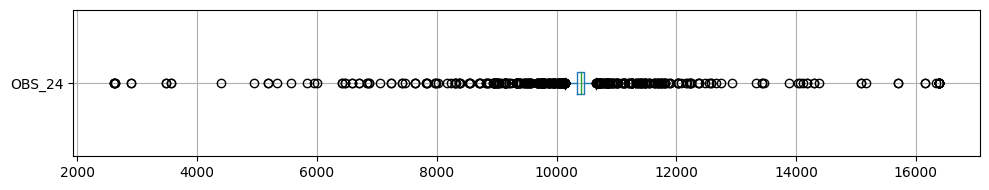

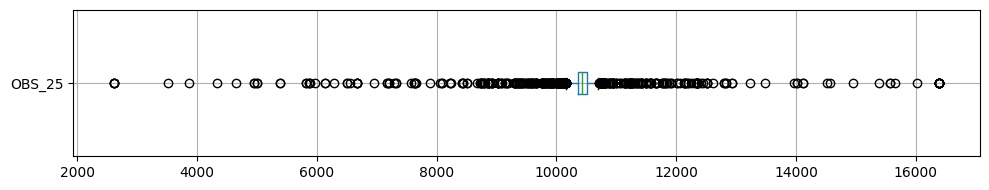

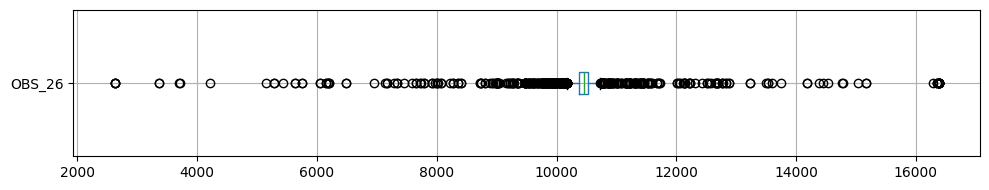

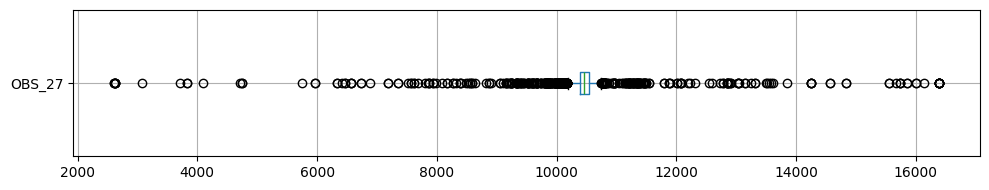

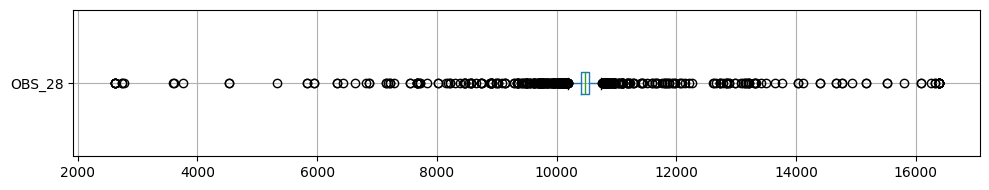

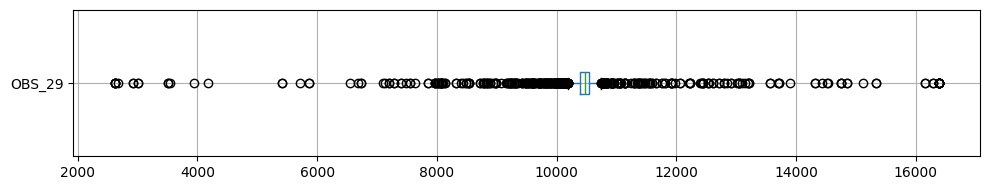

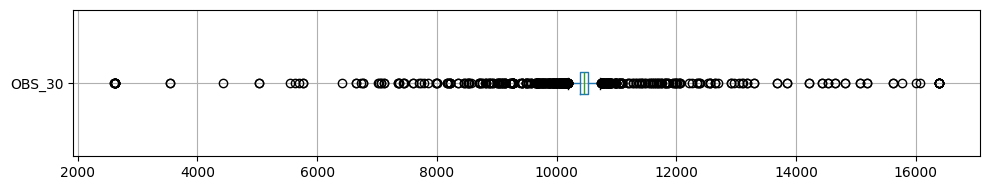

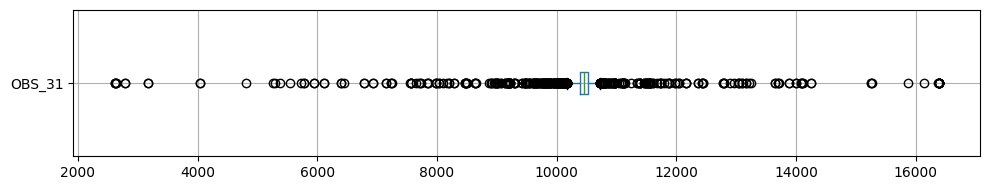

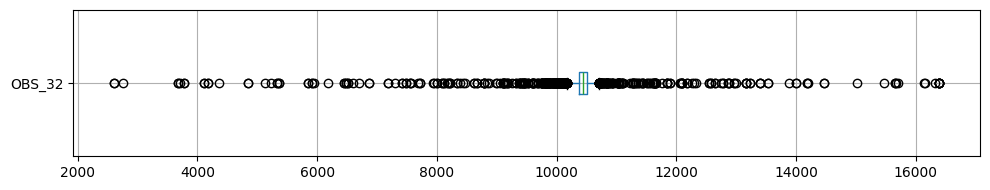

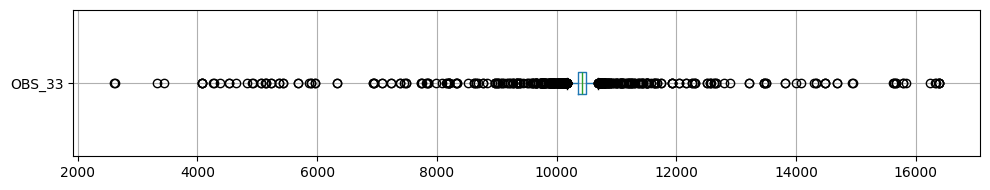

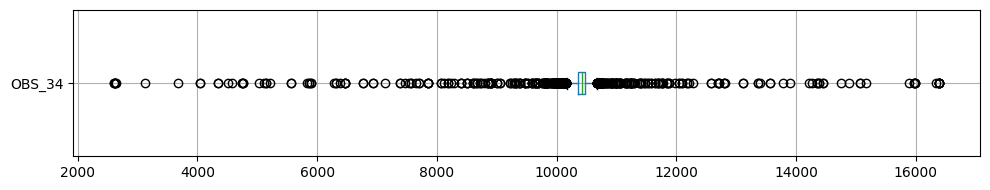

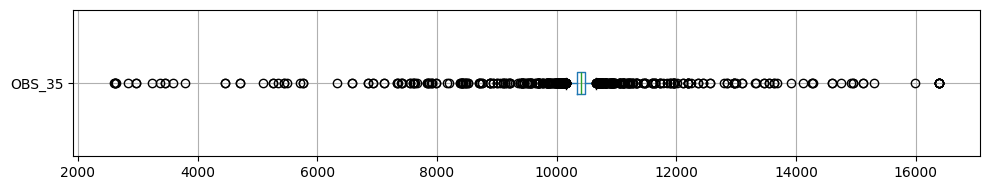

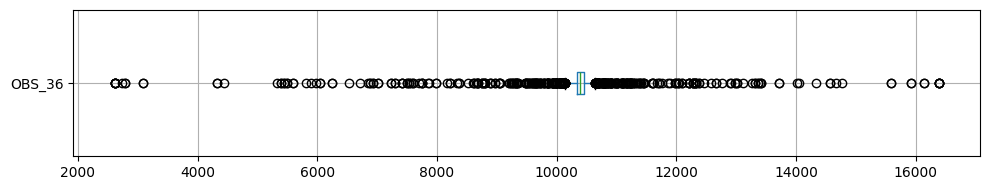

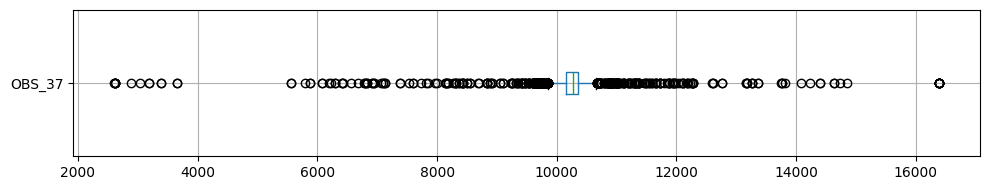

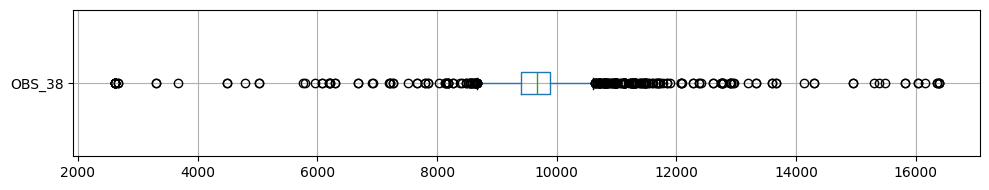

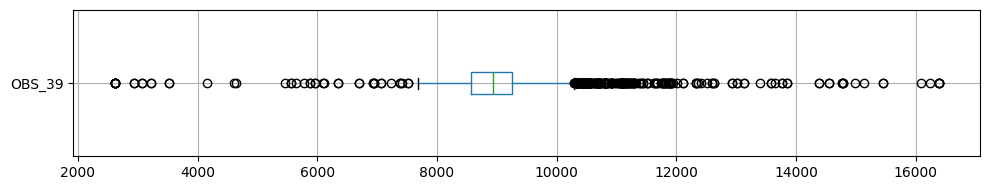

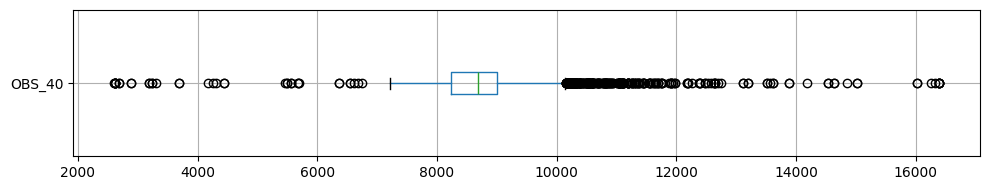

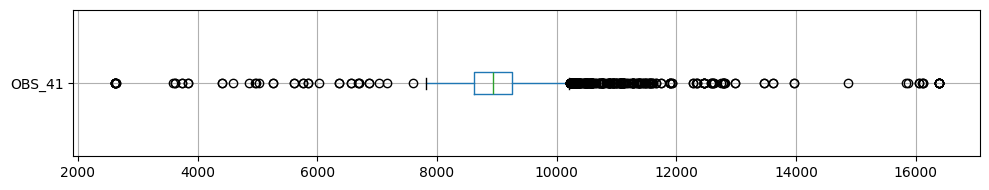

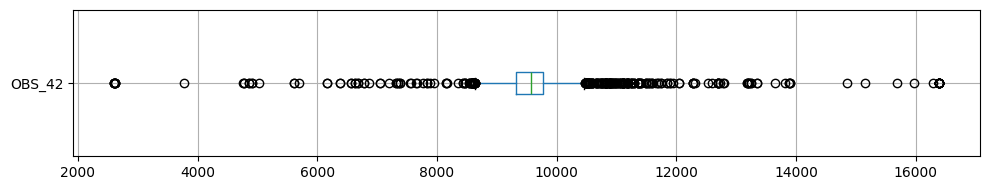

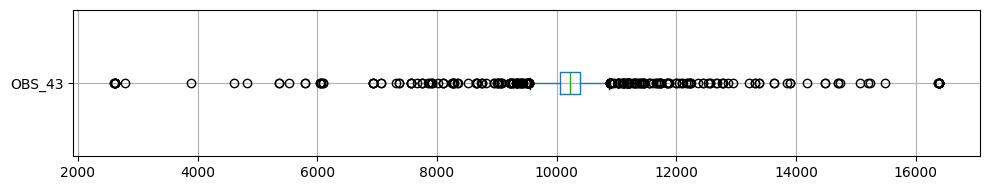

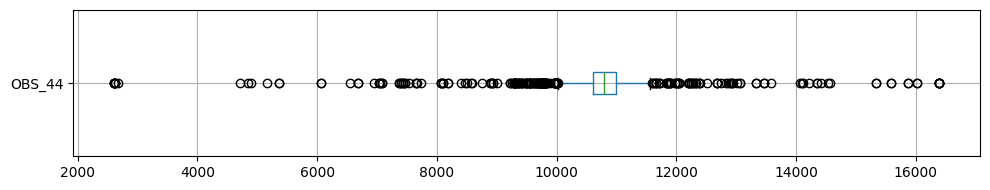

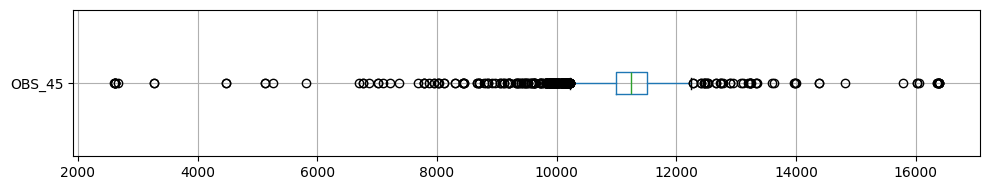

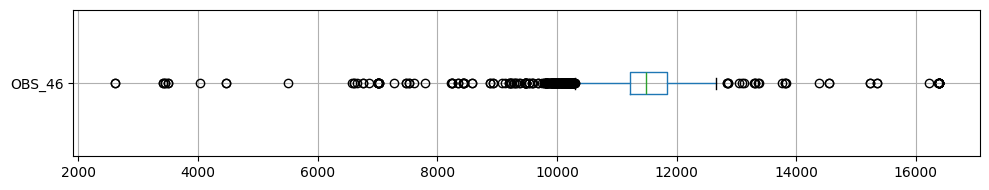

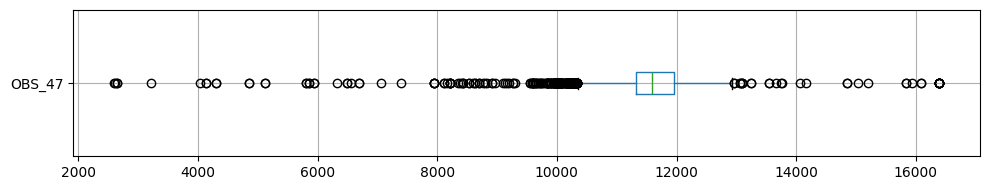

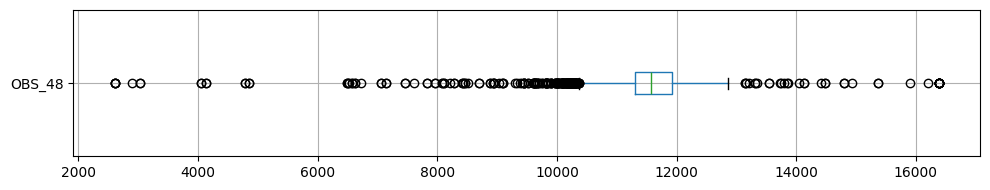

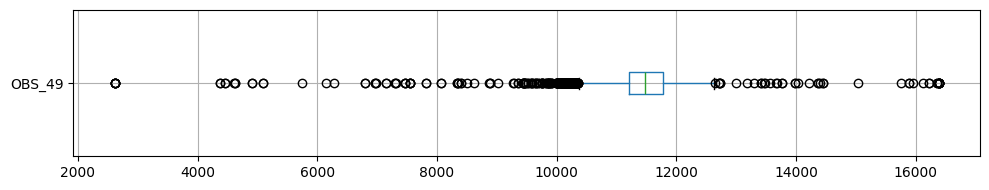

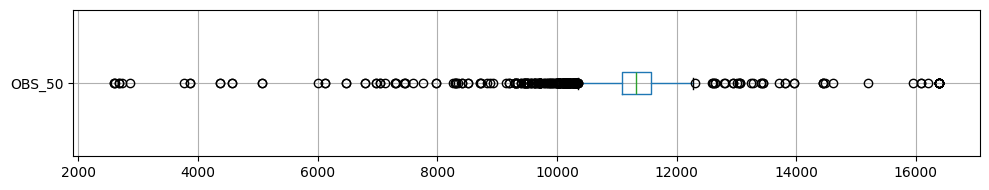

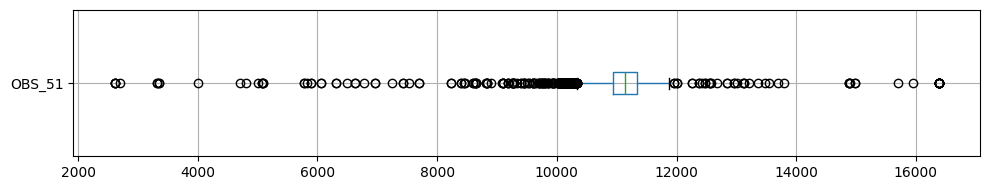

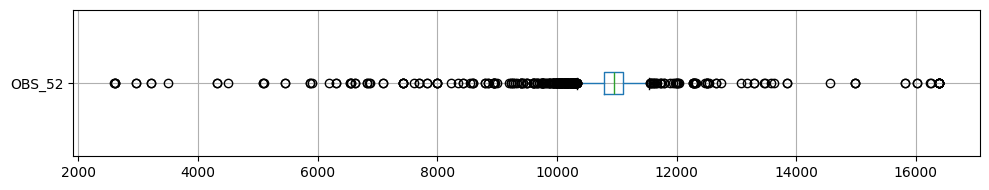

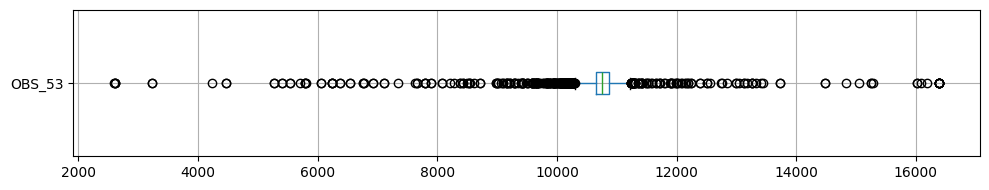

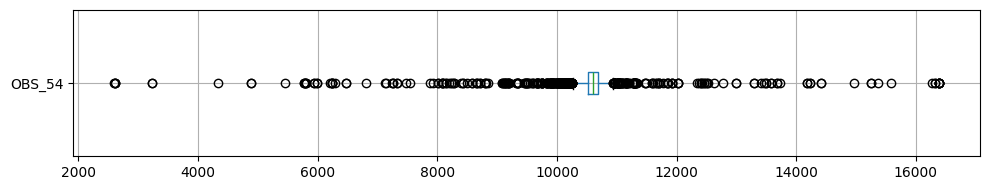

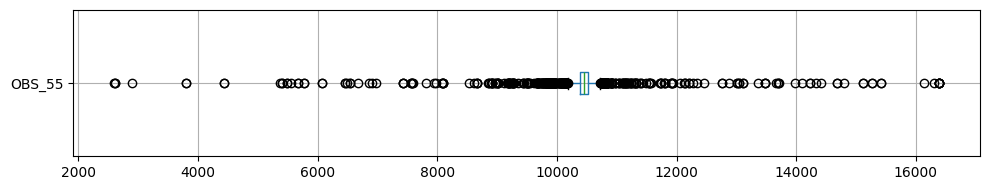

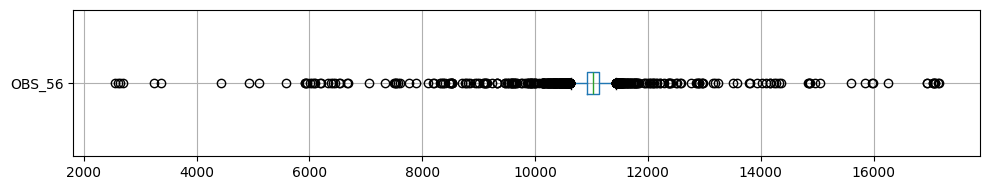

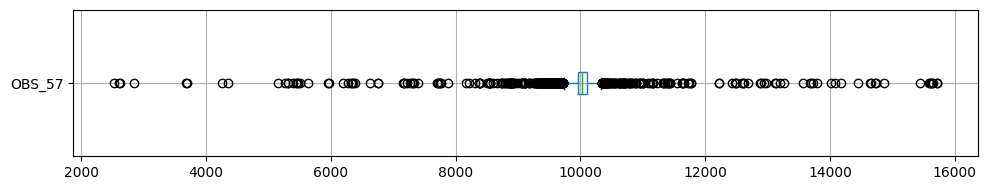

In [5]:
pirvision_continuous_columns = ['Temp (F)', 'Temp (C)']
pirvision_continuous_columns += ['OBS_' + str(i) for i in range(1, 58)]

for col in pirvision_continuous_columns:
    fig, ax = plt.subplots(figsize=(10, 2))
    pirvision_df[[col]].boxplot(vert=False, ax=ax)
    plt.tight_layout()
    plt.show()

In [6]:
heart_categorical_columns = heart_df.columns.difference(heart_continuous_df.columns)
heart_categorical_df = heart_df[heart_categorical_columns].copy()

non_missing = heart_categorical_df.notnull().sum()
unique = heart_categorical_df.nunique()

categorical_df = pd.DataFrame({
    'non_missing': non_missing,
    'unique': unique
})

categorical_df

,non_missing,unique
blood_pressure_medication,4196,2
chd_risk,4240,2
diabetes_history,4240,2
education_level,4158,4
gender,4240,2
high_blood_sugar,4240,2
hypertension_history,4240,2
smoking_status,3901,2
stroke_history,4240,2


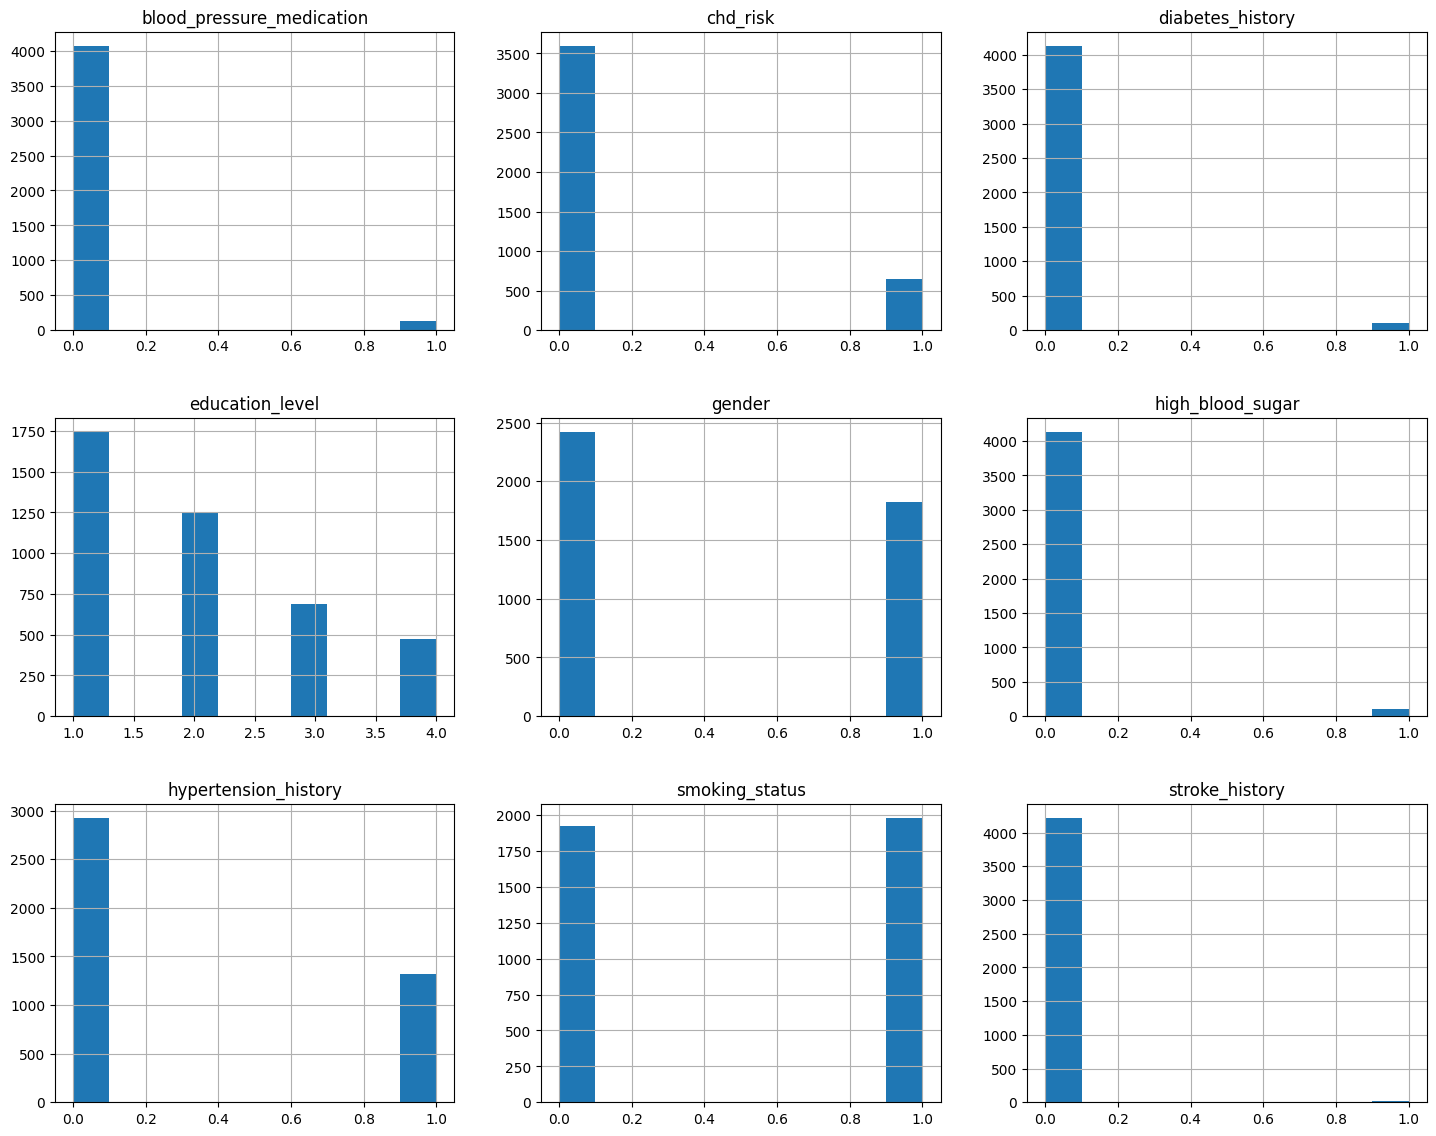

In [7]:
heart_categorical_df.hist(figsize=(15, 12))
plt.tight_layout(pad=3.0)
plt.show()

In [8]:
pirvision_categorical_columns = pirvision_df.columns.difference(pirvision_continuous_columns)
pirvision_categorical = pirvision_df[pirvision_categorical_columns].copy()

non_missing = pirvision_categorical.notnull().sum()
unique = pirvision_categorical.nunique()

categorical_df = pd.DataFrame({
    'non_missing': non_missing,
    'unique': unique
})

categorical_df

,non_missing,unique
Class,10000,3
Day,9000,3
Day Index,10000,3
Timestamp,9000,5502


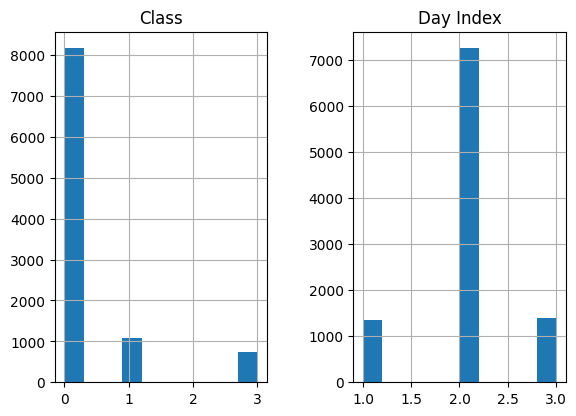

In [9]:
pirvision_categorical.hist()
plt.tight_layout(pad=3.0)
plt.show()

## 2. Analiza echilibrului de clase

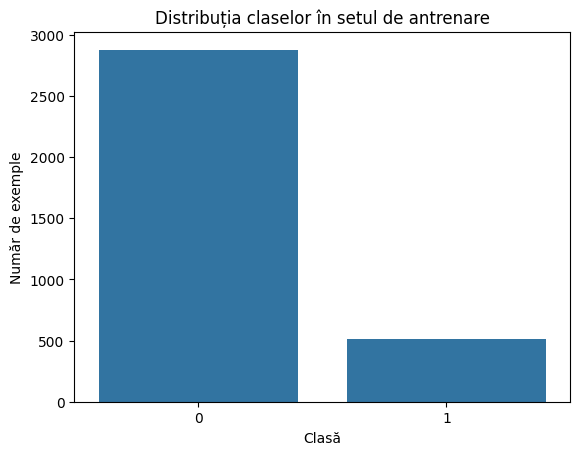

In [10]:
sns.countplot(data=heart_train_df, x='chd_risk')
plt.title('Distribuția claselor în setul de antrenare')
plt.xlabel('Clasă')
plt.ylabel('Număr de exemple')
plt.show()

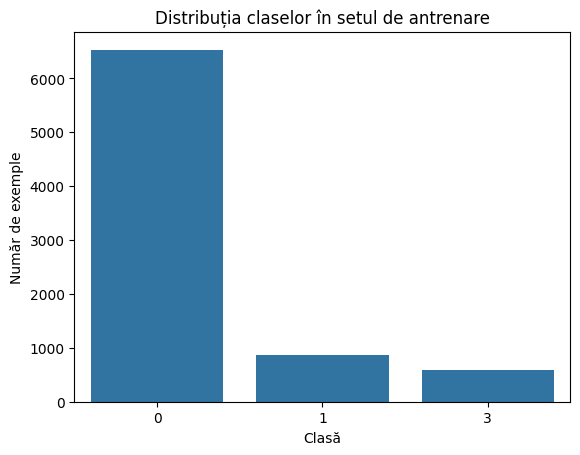

In [11]:
sns.countplot(data=pirvision_train_df, x='Class')
plt.title('Distribuția claselor în setul de antrenare')
plt.xlabel('Clasă')
plt.ylabel('Număr de exemple')
plt.show()

## 3. Analiza corelației între atribute

### Atribute numerice continue

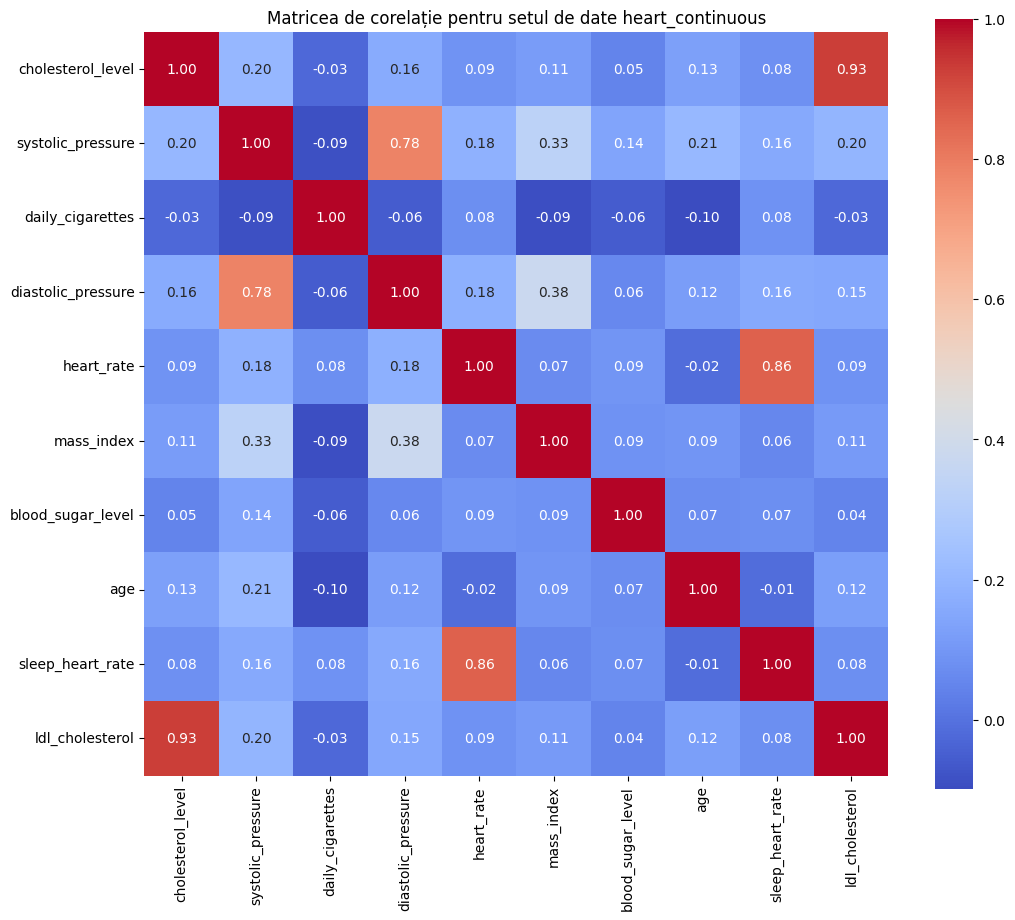

In [12]:
cor_matrix = heart_continuous_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matricea de corelație pentru setul de date heart_continuous")
plt.show()

### Atribute categorice

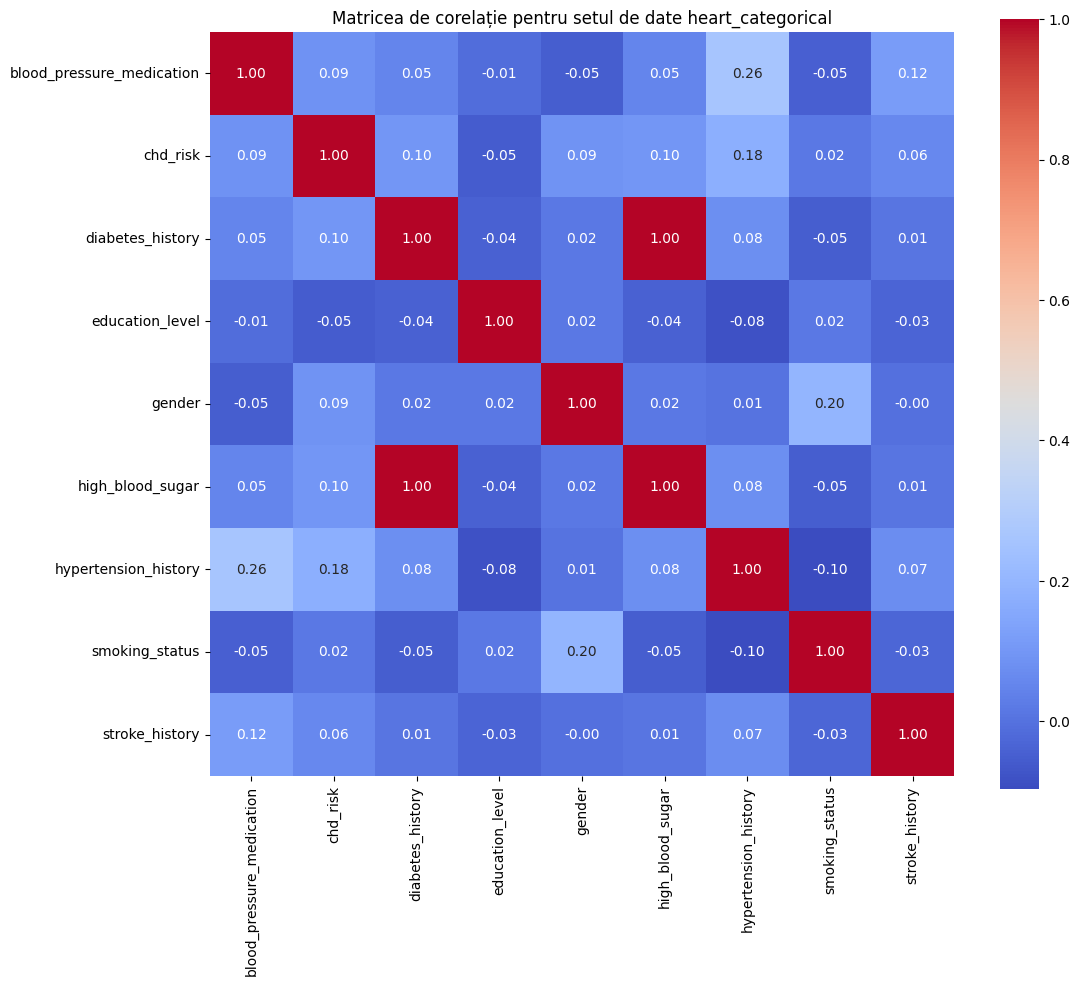

In [13]:
cor_matrix = heart_categorical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matricea de corelație pentru setul de date heart_categorical")
plt.show()

### Atribute numerice continue

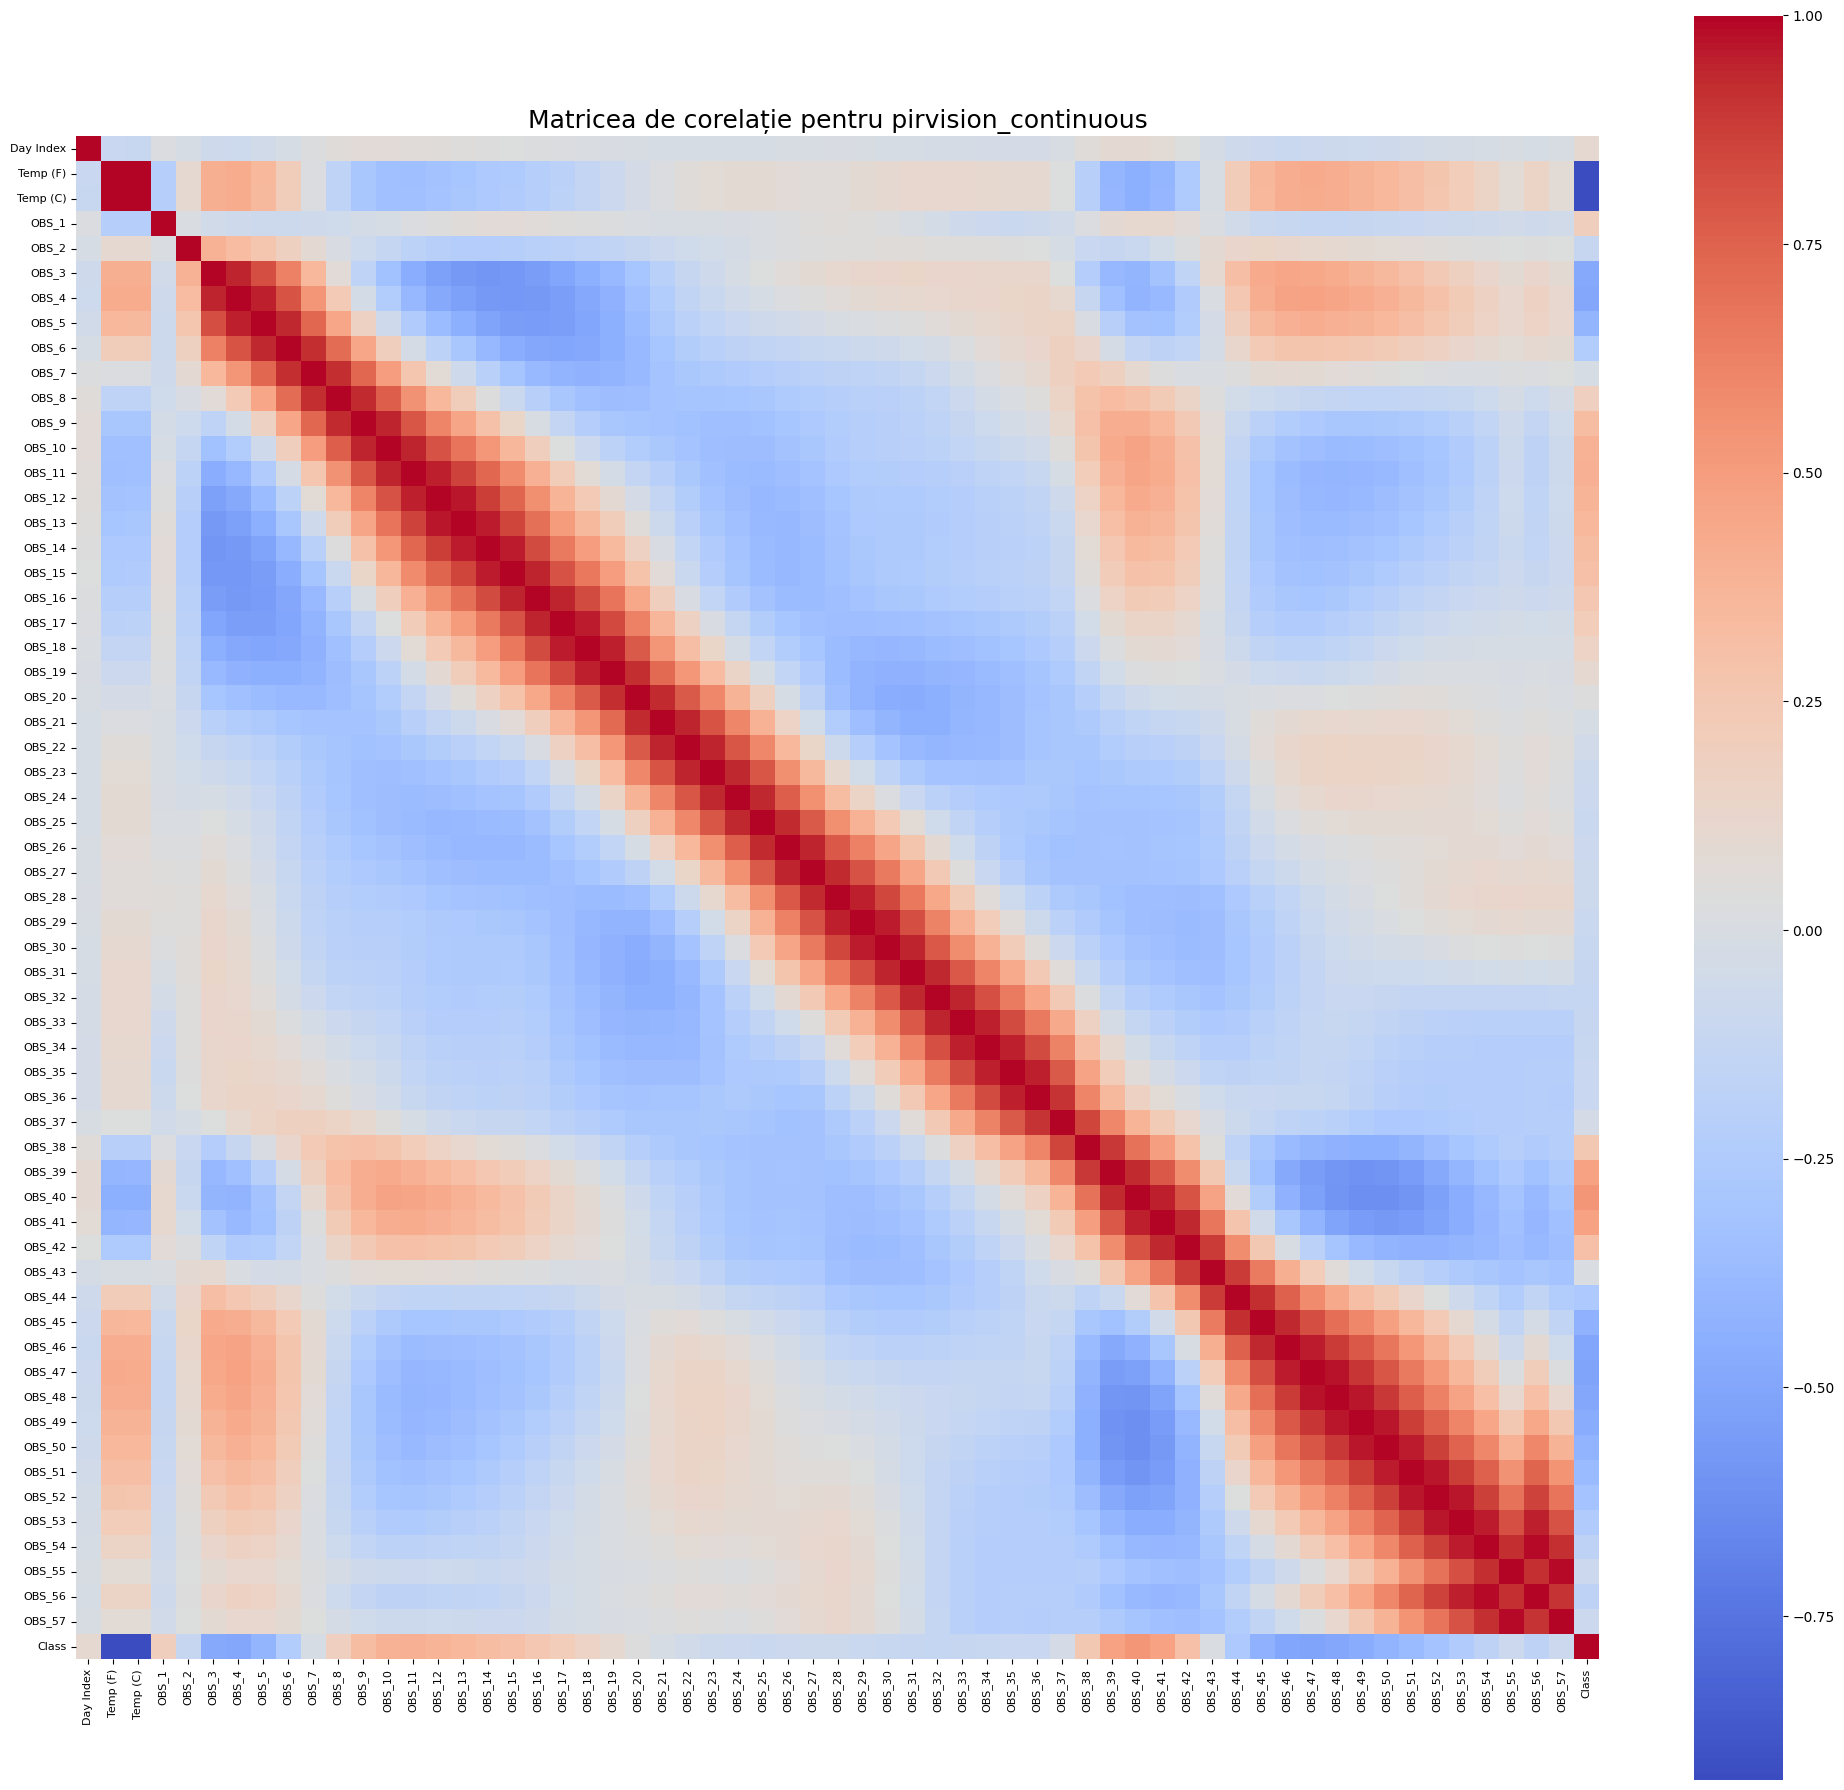

In [14]:
cor_matrix = pirvision_numerical.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(cor_matrix, cmap='coolwarm', square=True)
plt.title("Matricea de corelație pentru pirvision_continuous", fontsize=18)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

#  Preprocesarea datelor

## 2. Valori extreme pentru un atribut într-un eșantion 

In [15]:
import numpy as np

# Heart
Q1 = heart_df[heart_continuous_columns].quantile(0.25)
Q3 = heart_df[heart_continuous_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((heart_df[heart_continuous_columns] < (Q1 - 1.5 * IQR)) | (heart_df[heart_continuous_columns] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

for col in heart_continuous_columns:
    q1 = heart_df[col].quantile(0.25)
    q3 = heart_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    heart_df[col] = heart_df[col].mask((heart_df[col] < lower_bound) | (heart_df[col] > upper_bound), np.nan)

print()

# Pirvision
Q1 = pirvision_df[pirvision_continuous_columns].quantile(0.25)
Q3 = pirvision_df[pirvision_continuous_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((pirvision_df[pirvision_continuous_columns] < (Q1 - 1.5 * IQR)) | (pirvision_df[pirvision_continuous_columns] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

for col in pirvision_continuous_columns:
    q1 = pirvision_df[col].quantile(0.25)
    q3 = pirvision_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    pirvision_df[col] = pirvision_df[col].mask((pirvision_df[col] < lower_bound) | (pirvision_df[col] > upper_bound), np.nan)

cholesterol_level      60
systolic_pressure     126
daily_cigarettes       12
diastolic_pressure     77
heart_rate             76
mass_index             97
blood_sugar_level     203
age                   128
sleep_heart_rate       64
ldl_cholesterol        51
dtype: int64

Temp (F)    746
Temp (C)    746
OBS_1       430
OBS_2       547
OBS_3       315
OBS_4       340
OBS_5       322
OBS_6       312
OBS_7       351
OBS_8       323
OBS_9       307
OBS_10      293
OBS_11      277
OBS_12      284
OBS_13      277
OBS_14      302
OBS_15      314
OBS_16      333
OBS_17      362
OBS_18      419
OBS_19      436
OBS_20      450
OBS_21      462
OBS_22      449
OBS_23      440
OBS_24      433
OBS_25      418
OBS_26      428
OBS_27      412
OBS_28      409
OBS_29      426
OBS_30      458
OBS_31      438
OBS_32      442
OBS_33      451
OBS_34      444
OBS_35      451
OBS_36      433
OBS_37      456
OBS_38      252
OBS_39      278
OBS_40      324
OBS_41      308
OBS_42      283
OBS_43      237
OBS_44

## 1. Date lipsă pentru un atribut într-un eșantion

In [16]:
from sklearn.impute import SimpleImputer

# Heart
continuous_imputer = SimpleImputer(strategy='median')
heart_df[heart_continuous_columns] = continuous_imputer.fit_transform(heart_df[heart_continuous_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
heart_df[heart_categorical_columns] = categorical_imputer.fit_transform(heart_df[heart_categorical_columns])

# Pirvision
pirvision_df[pirvision_continuous_columns] = continuous_imputer.fit_transform(pirvision_df[pirvision_continuous_columns])
pirvision_df[pirvision_categorical_columns] = categorical_imputer.fit_transform(pirvision_df[pirvision_categorical_columns])

## 3. Atribute redundante (puternic corelate)

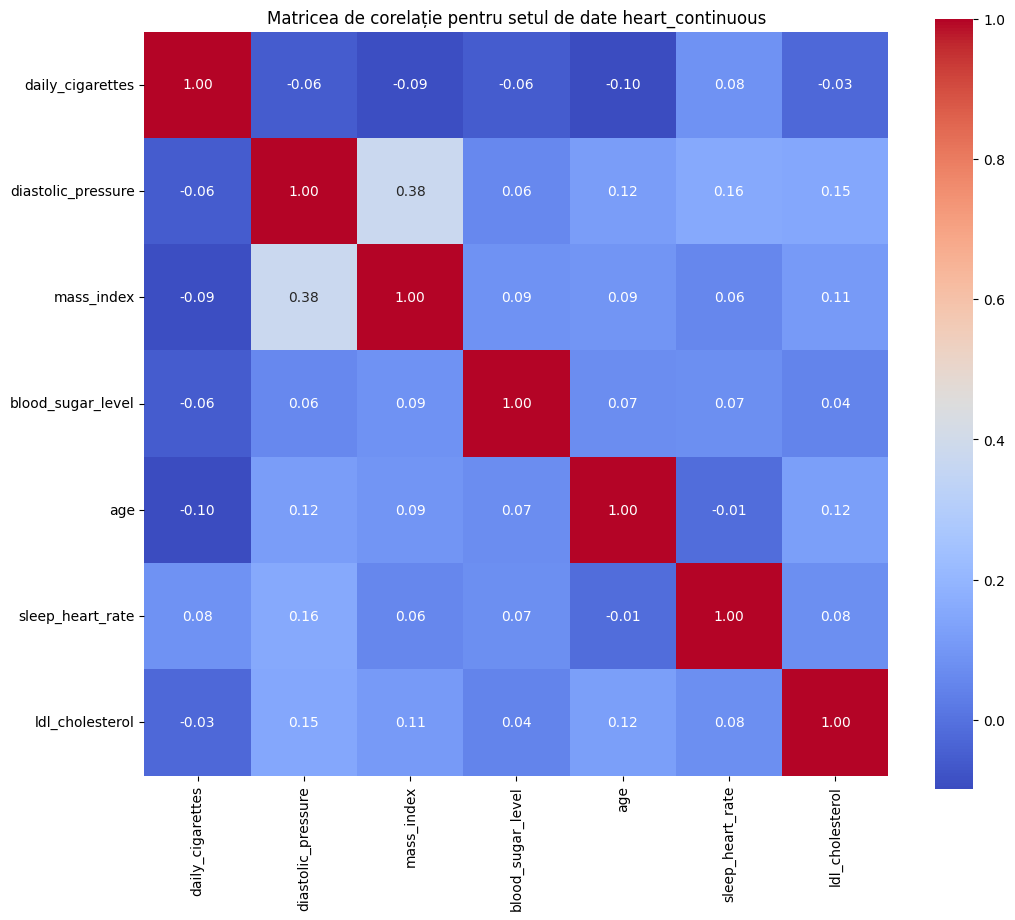

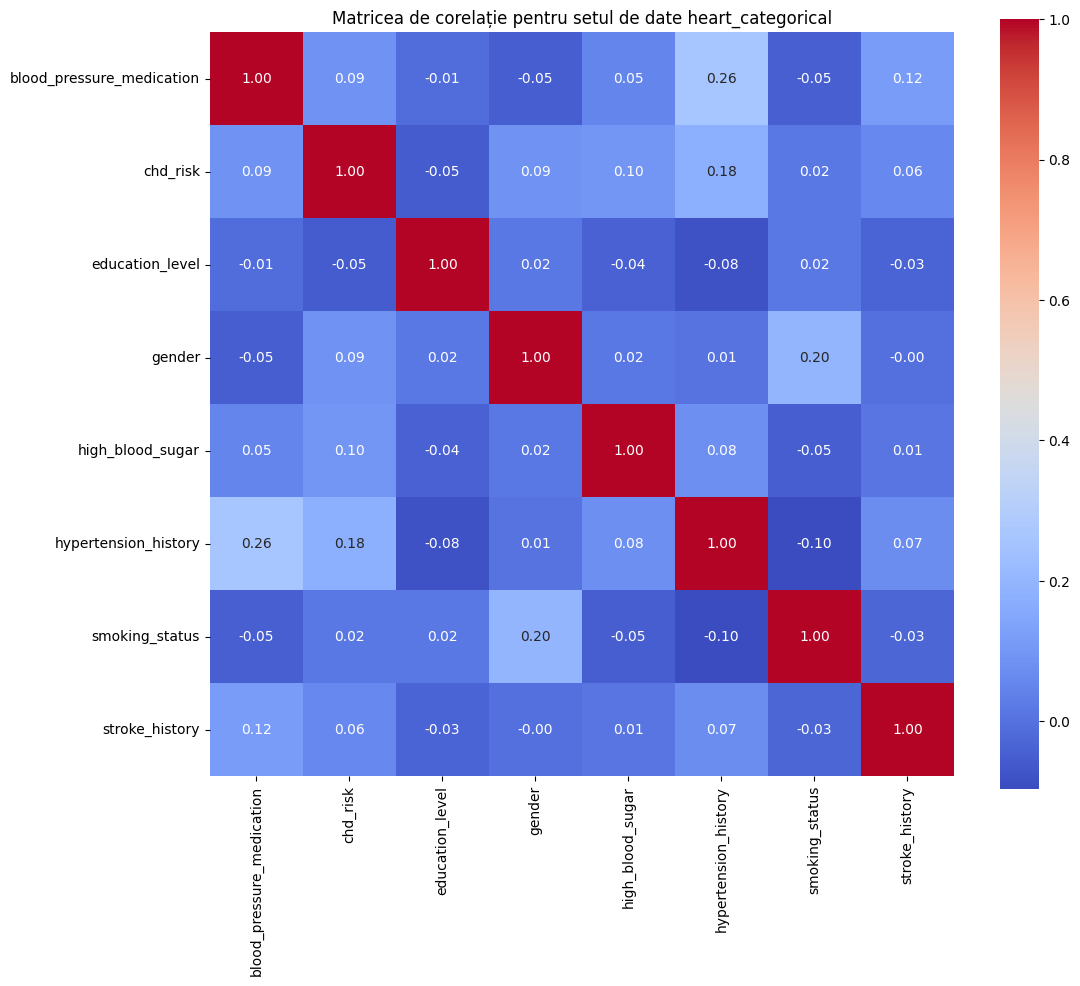

In [17]:
from scipy.stats import chi2_contingency

# Drop strongly correlated variables
heart_columns_drop = ['cholesterol_level', 'systolic_pressure', 'heart_rate', 'diabetes_history']
heart_df = heart_df.drop(columns=heart_columns_drop)

# Display new correlation matrixes
heart_continuous_df = heart_continuous_df.drop(columns=heart_columns_drop[:-1], errors='ignore')
cor_matrix = heart_continuous_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matricea de corelație pentru setul de date heart_continuous")
plt.show()

print()

heart_categorical_df = heart_categorical_df.drop(columns=heart_columns_drop[-1], errors='ignore')
cor_matrix = heart_categorical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matricea de corelație pentru setul de date heart_categorical")
plt.show()

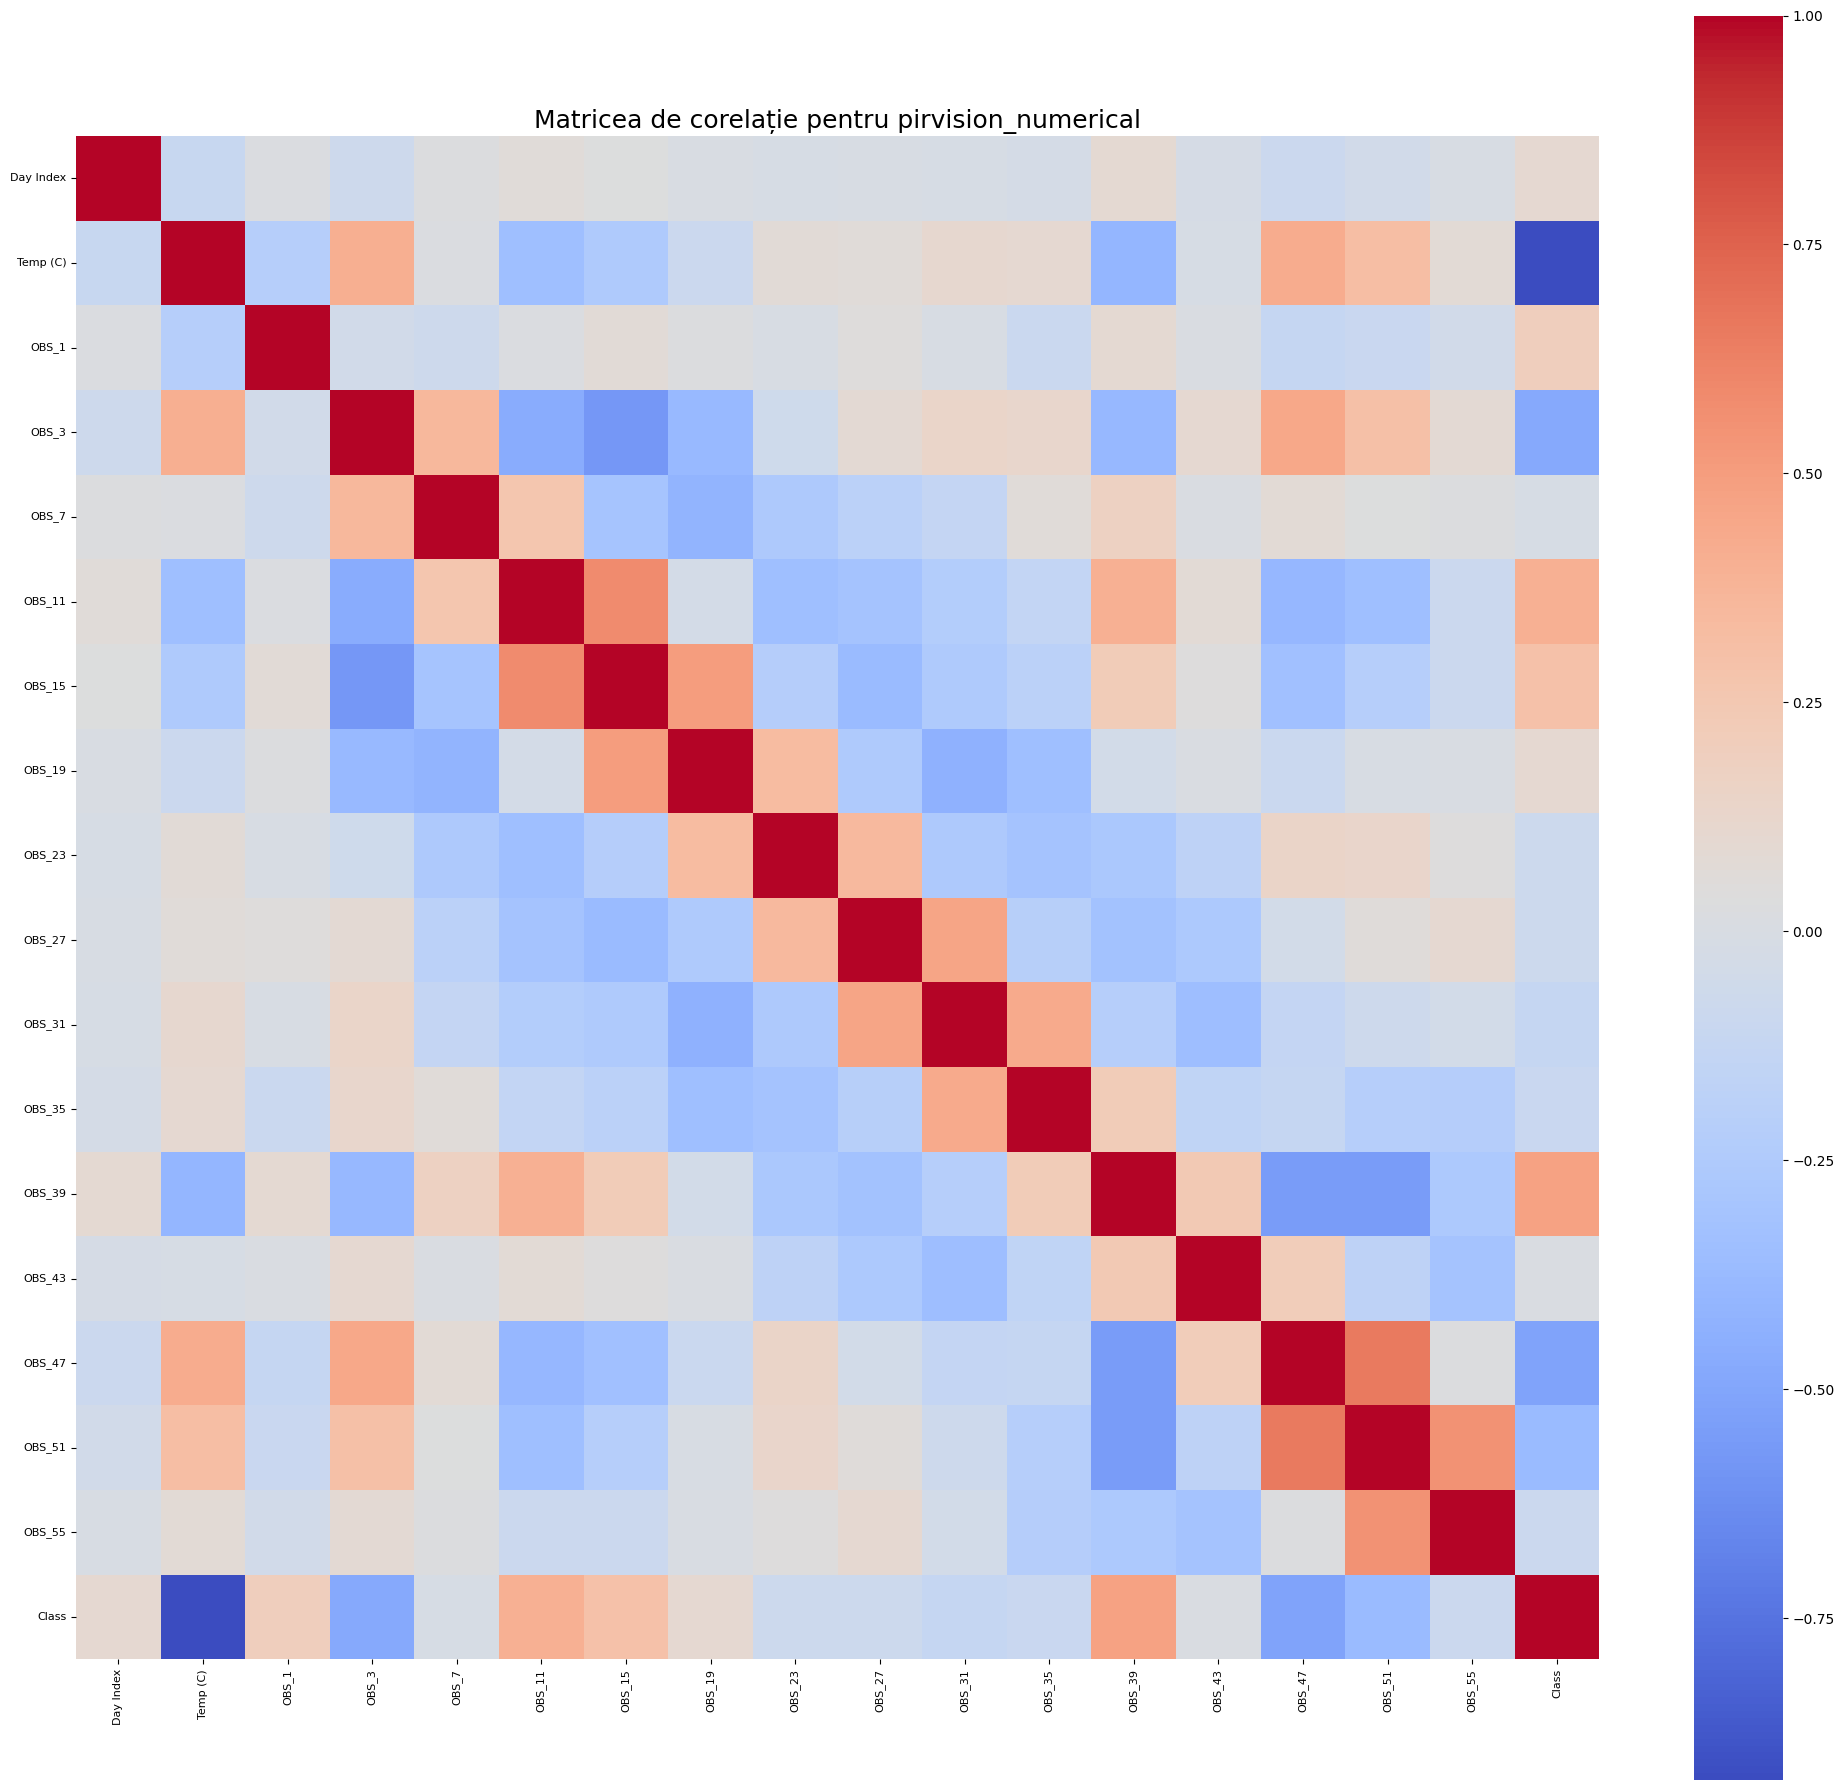

In [18]:
# Drop strongly correlated variables
pirvision_columns_drop = ['Temp (F)'] + ['OBS_' + str(i) for i in range(2, 57, 2)] + ['OBS_' + str(i) for i in range(5, 58, 4)] 
pirvision_df = pirvision_df.drop(columns=pirvision_columns_drop)

# Display new correlation matrix
pirvision_numerical = pirvision_numerical.drop(columns=pirvision_columns_drop, errors='ignore')
cor_matrix = pirvision_numerical.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(cor_matrix, cmap='coolwarm', square=True)
plt.title("Matricea de corelație pentru pirvision_numerical", fontsize=18)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

## 4. Plaje valorice de mărimi diferite pentru atributele numerice

# Utilizarea algoritmilor de Învățare Automată 

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight

# Heart dataset
le = LabelEncoder()
heart_df['chd_risk'] = le.fit_transform(heart_df['chd_risk'])
heart_df_encoded = pd.get_dummies(heart_df, drop_first=True)

# Pirvision dataset
pirvision_df['Class'] = le.fit_transform(pirvision_df['Class'])
pirvision_df_encoded = pd.get_dummies(pirvision_df, drop_first=True)

##  Arbori de Decizie

### Heart Dataset

Accuracy: 0.6969339622641509

Class 0:
  Precision: 0.90
  Recall:    0.73
  F1-score:  0.81
  Support:   731.0

Class 1:
  Precision: 0.22
  Recall:    0.48
  F1-score:  0.30
  Support:   117.0



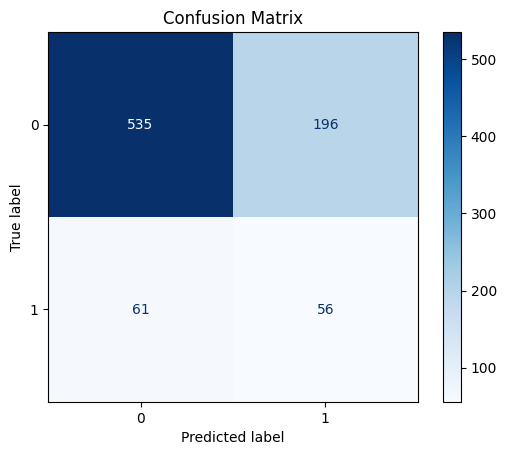

In [20]:
# X and y
X = heart_df_encoded.drop('chd_risk', axis=1)
y = heart_df_encoded['chd_risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf_dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=10,
    criterion='entropy',
    class_weight= 'balanced',
    random_state=42
)

clf_dt.fit(X_train, y_train)

y_pred = clf_dt.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print()

report = classification_report(y_test, y_pred, output_dict=True)

# Display metrics
for class_label in ['0', '1']:
    metrics = report[class_label]
    print(f"Class {class_label}:")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall:    {metrics['recall']:.2f}")
    print(f"  F1-score:  {metrics['f1-score']:.2f}")
    print(f"  Support:   {metrics['support']}")
    print()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_dt.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Pirvision Dataset

Accuracy: 0.9755

Class 0:
  Precision: 0.99
  Recall:    1.00
  F1-score:  0.99
  Support:   1630.0

Class 1:
  Precision: 0.91
  Recall:    0.91
  F1-score:  0.91
  Support:   202.0

Class 2:
  Precision: 0.90
  Recall:    0.86
  F1-score:  0.88
  Support:   168.0



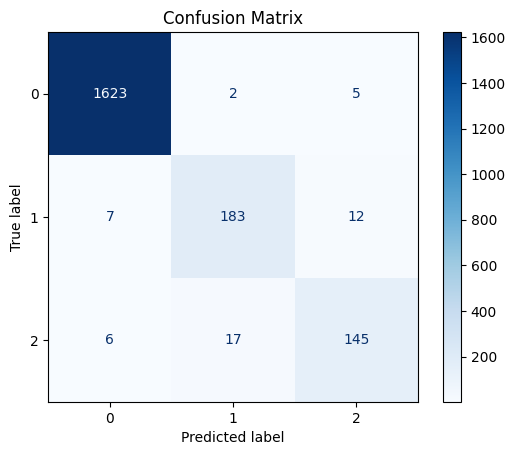

In [21]:
# X and y
X = pirvision_df_encoded.drop('Class', axis=1)
y = pirvision_df_encoded['Class']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf_dt = DecisionTreeClassifier(
    min_samples_leaf=1,
    criterion='entropy',
    class_weight= 'balanced',
    random_state=42
)

clf_dt.fit(X_train, y_train)

y_pred = clf_dt.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print()

report = classification_report(y_test, y_pred, output_dict=True)

# Display metrics
for class_label in ['0', '1', '2']:
    metrics = report[class_label]
    print(f"Class {class_label}:")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall:    {metrics['recall']:.2f}")
    print(f"  F1-score:  {metrics['f1-score']:.2f}")
    print(f"  Support:   {metrics['support']}")
    print()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_dt.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Random Forest

### Heart Dataset

Accuracy: 0.7747641509433962

Class 0:
  Precision: 0.90
  Recall:    0.83
  F1-score:  0.86
  Support:   731.0

Class 1:
  Precision: 0.28
  Recall:    0.42
  F1-score:  0.34
  Support:   117.0



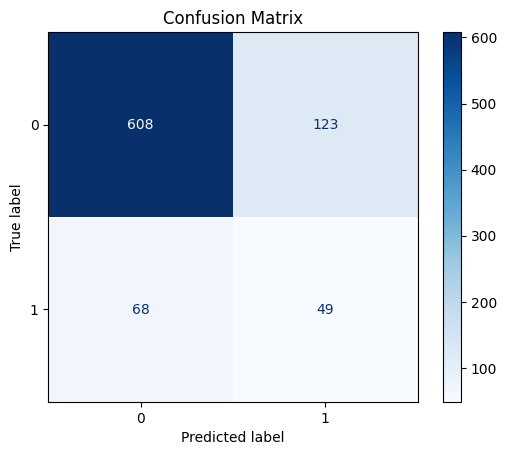

In [22]:
# X and y
X = heart_df_encoded.drop('chd_risk', axis=1)
y = heart_df_encoded['chd_risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf_rf = RandomForestClassifier(
    min_samples_leaf=10,
    criterion='entropy',
    n_estimators=50,
    max_samples=1.0,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print()

report = classification_report(y_test, y_pred, output_dict=True)

# Display metrics
for class_label in ['0', '1']:
    metrics = report[class_label]
    print(f"Class {class_label}:")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall:    {metrics['recall']:.2f}")
    print(f"  F1-score:  {metrics['f1-score']:.2f}")
    print(f"  Support:   {metrics['support']}")
    print()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Pirvision Dataset

Accuracy: 0.978

Class 0:
  Precision: 0.99
  Recall:    1.00
  F1-score:  0.99
  Support:   1630.0

Class 1:
  Precision: 0.88
  Recall:    0.96
  F1-score:  0.92
  Support:   202.0

Class 2:
  Precision: 0.99
  Recall:    0.80
  F1-score:  0.89
  Support:   168.0



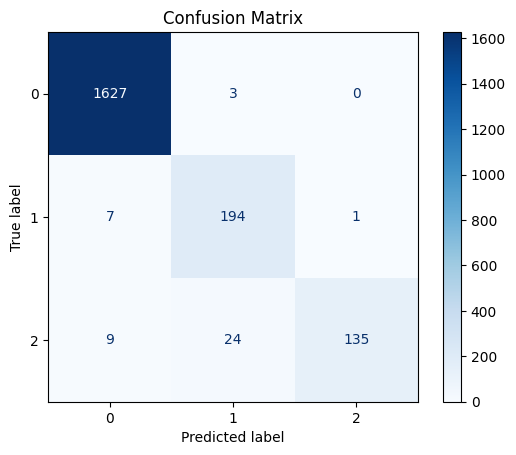

In [23]:
# X and y
X = pirvision_df_encoded.drop('Class', axis=1)
y = pirvision_df_encoded['Class']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf_rf = RandomForestClassifier(
    min_samples_leaf=1,
    criterion='gini',
    n_estimators=50,
    max_samples=1.0,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print()

report = classification_report(y_test, y_pred, output_dict=True)

# Display metrics
for class_label in ['0', '1', '2']:
    metrics = report[class_label]
    print(f"Class {class_label}:")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall:    {metrics['recall']:.2f}")
    print(f"  F1-score:  {metrics['f1-score']:.2f}")
    print(f"  Support:   {metrics['support']}")
    print()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Regresie Logistica

In [24]:
from tqdm import tqdm

def logistic(x):
    # Clip x to prevent overflow
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(np.float64(-x)))

def nll(Y, T):
    # Add small epsilon to prevent log(0)
    epsilon = 1e-15
    Y = np.clip(Y, epsilon, 1 - epsilon)
    N = T.shape[0]
    return - (1 / N) * np.sum(T * np.log(Y) + (1 - T) * np.log(1 - Y))

def accuracy(Y, T):
    N = Y.shape[0]
    predicted_labels = (Y >= 0.5)
    return np.mean(predicted_labels == T)

def predict_logistic(X, w):
    z = np.dot(X, w)
    return logistic(z)

def train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=0.01, epochs_no=1000, 
                           use_class_weights=True, verbose=True):
    N, D = X_train.shape
    
    # Initialize weights
    w = np.random.randn(D) * 0.01 
    
    # Compute class weights to handle imbalance
    if use_class_weights:
        classes = np.unique(T_train)
        class_weights = compute_class_weight('balanced', classes=classes, y=T_train)
        weights_dict = dict(zip(classes, class_weights))
        sample_weights = np.array([weights_dict[label] for label in T_train])
    else:
        sample_weights = np.ones(N)
    
    train_acc, test_acc = [], []
    train_nll, test_nll = [], []
    
    for epoch in tqdm(range(epochs_no)):
        Y_train = predict_logistic(X_train, w)
        Y_test = predict_logistic(X_test, w)
        
        # Compute metrics
        train_acc.append(accuracy(Y_train, T_train))
        test_acc.append(accuracy(Y_test, T_test))
        train_nll.append(nll(Y_train, T_train))
        test_nll.append(nll(Y_test, T_test))
        
        # Compute weighted gradient
        error = Y_train - T_train
        weighted_error = error * sample_weights
        grad = np.dot(X_train.T, weighted_error) / N
        
        # Update weights
        w = w - lr * grad

    return w, train_nll, test_nll, train_acc, test_acc

### Heart Dataset

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 811.26it/s]


Accuracy: 0.8266509433962265

Class 0:
  Precision: 0.86
  Recall:    0.95
  F1-score:  0.90
  Support:   719.0

Class 1:
  Precision: 0.33
  Recall:    0.13
  F1-score:  0.19
  Support:   129.0



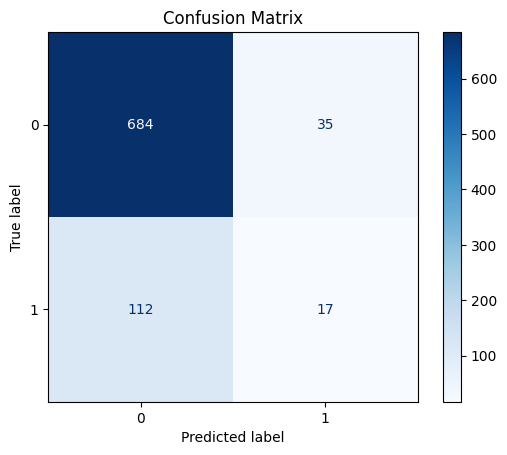

In [25]:
import numpy as np

# X and y
X = heart_df_encoded.drop('chd_risk', axis=1).values
y = heart_df_encoded['chd_risk'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=42, 
                                                        stratify=y)

# Add bias term (intercept)
X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])

# Train model
w, train_nll, test_nll, train_acc, test_acc = train_and_eval_logistic(
    X_train, y_train, X_test, y_test, 
    lr=0.01, epochs_no=1000, use_class_weights=True
)

y_pred = predict_logistic(X_test, w)
y_pred = (y_pred >= 0.5).astype(int)    

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print()

report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Display metrics
for class_label in ['0', '1']:
    metrics = report[class_label]
    print(f"Class {class_label}:")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall:    {metrics['recall']:.2f}")
    print(f"  F1-score:  {metrics['f1-score']:.2f}")
    print(f"  Support:   {metrics['support']}")
    print()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Pirvision Dataset

## Multi-Layered Perceptron 

## Heart Dataset

Accuracy: 0.7558962264150944

Class 0:
  Precision: 0.90
  Recall:    0.81
  F1-score:  0.85
  Support:   731.0

Class 1:
  Precision: 0.26
  Recall:    0.43
  F1-score:  0.33
  Support:   117.0



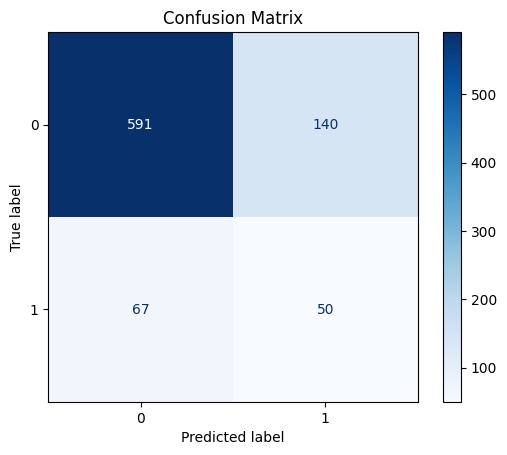

In [26]:
# X and y
X = heart_df_encoded.drop('chd_risk', axis=1)
y = heart_df_encoded['chd_risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    alpha=0.01,
    learning_rate_init=0.001,
    batch_size=64,
    early_stopping=False,
    max_iter=200,
    random_state=42
)

clf_mlp.fit(X_train, y_train)

y_pred = clf_mlp.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print()

report = classification_report(y_test, y_pred, output_dict=True)

# Display metrics
for class_label in ['0', '1']:
    metrics = report[class_label]
    print(f"Class {class_label}:")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall:    {metrics['recall']:.2f}")
    print(f"  F1-score:  {metrics['f1-score']:.2f}")
    print(f"  Support:   {metrics['support']}")
    print()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_mlp.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Pirvision Dataset

Accuracy: 0.8955

Class 0:
  Precision: 0.93
  Recall:    0.99
  F1-score:  0.96
  Support:   1630.0

Class 1:
  Precision: 0.73
  Recall:    0.84
  F1-score:  0.78
  Support:   202.0

Class 2:
  Precision: 0.39
  Recall:    0.09
  F1-score:  0.15
  Support:   168.0



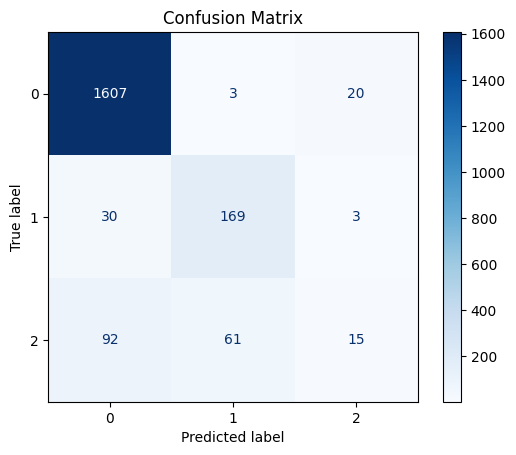

In [27]:
# X and y
X = pirvision_df_encoded.drop('Class', axis=1)
y = pirvision_df_encoded['Class']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf_mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    alpha=0.001,
    learning_rate_init=0.001,
    batch_size=64,
    early_stopping=True,
    max_iter=200,
    random_state=42
)

clf_mlp.fit(X_train, y_train)

y_pred = clf_mlp.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print()

report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Display metrics
for class_label in ['0', '1', '2']:
    metrics = report[class_label]
    print(f"Class {class_label}:")
    print(f"  Precision: {metrics['precision']:.2f}")
    print(f"  Recall:    {metrics['recall']:.2f}")
    print(f"  F1-score:  {metrics['f1-score']:.2f}")
    print(f"  Support:   {metrics['support']}")
    print()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_mlp.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()